<a href="https://colab.research.google.com/github/SShalini24/Forest-Fire-in-Brazil-EDA-/blob/main/Forest_Fire_in_Brazil_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('amazon.csv',encoding ="iso -8859-1",parse_dates=['date'])
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


**Display First 5 Rows of the Dataset**

In [23]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


**Display last 5 Rows of the Dataset**

In [24]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [25]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [26]:
# we will have treat date columns as datetime and not object

**Shape of the Dataset**

In [27]:
data.shape

(6454, 5)

**Display Informtaion about the Dataset**

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


**Display Statistical Details of the Dataset**

In [29]:
data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


**Check the Duplicates in the Datset**

In [30]:
data.duplicated().sum()

32

In [31]:
data = data.drop_duplicates()

In [33]:
data.duplicated().sum()

0

**Check the Null Values in the Datset**

In [32]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

**Rename Months Name to English**

In [34]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [ ]:
data['month_new'] = data['month'].map({'Janeiro':'Jan',
                                       'Fevereiro':'Feb',
                                       'Marco':'March',
                                       'Abril':'April',
                                       'Maio':'May',
                                       'Junho':'June',
                                       'Julho':'July',
                                       'Agosto':'Aug',
                                       'Setembro':'Sep',
                                       'Outubro':'Oct',
                                       'Novembro':'Nov',
                                       'Dezembro':'Dec'})

In [39]:
data['month_new'].value_counts()

Aug      540
Sep      540
Oct      540
Nov      540
June     539
July     539
Jan      535
Feb      535
April    534
May      533
Dec      513
Name: month_new, dtype: int64

**Total Number of Fires Registered**

In [40]:
data.shape

(6422, 6)

In [ ]:
# In total 6422 cased were reported

**In Which month maximum number of Forest Fires were reported?**

In [41]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [52]:
data.groupby('month_new')['number'].sum().reset_index()

,month_new,number
0,April,28184.770
1,Aug,88050.435
2,Dec,57535.480
3,Feb,30839.050
4,Jan,47681.844
5,July,92319.113
6,June,55997.675
7,May,34725.363
8,Nov,85508.054
9,Oct,88681.579


<Axes: xlabel='month_new', ylabel='number'>

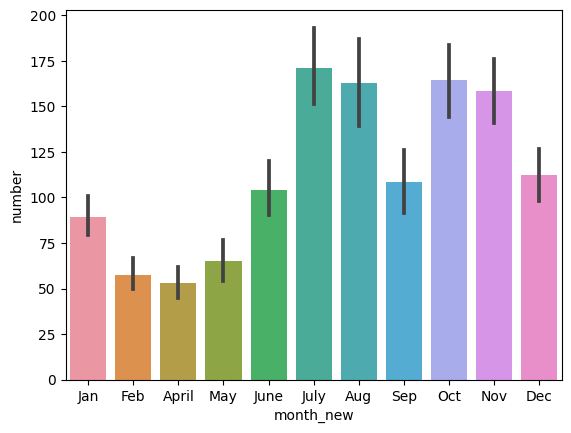

In [53]:
sns.barplot(data=data,x='month_new',y='number')

Maximum number of Forest Fires was reported in the month of July

**In Which year maximum number of Forest Fires were repoted?**

In [54]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [57]:
data.groupby('year')['number'].sum().reset_index()

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

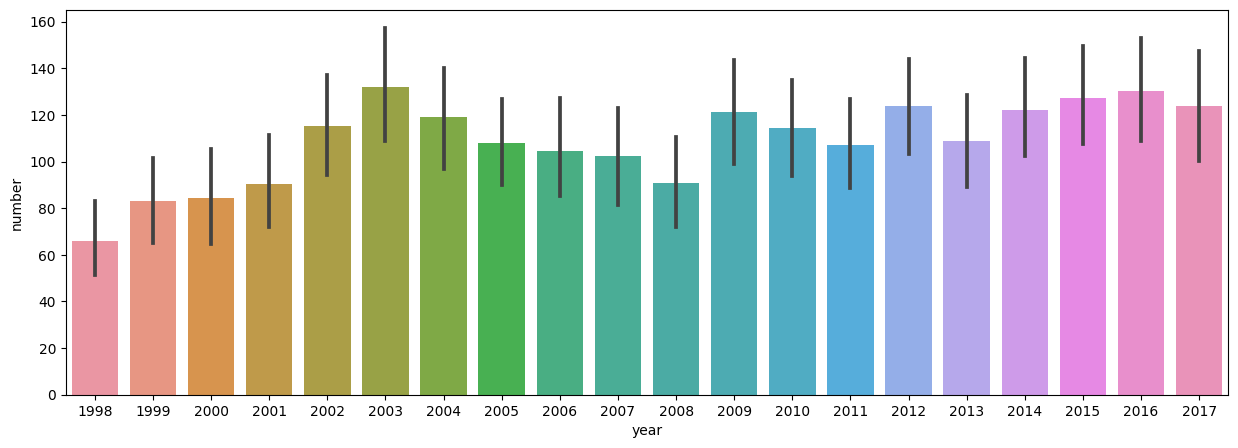

In [62]:
plt.figure(figsize=(15,5))
sns.barplot(data = data,x ='year',y ='number')

**Maximum number of forest fire was reported in the year 2003**

**In which state maximum number of forest fire was reported?**

In [63]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [64]:
data.groupby('state')['number'].sum().reset_index()

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


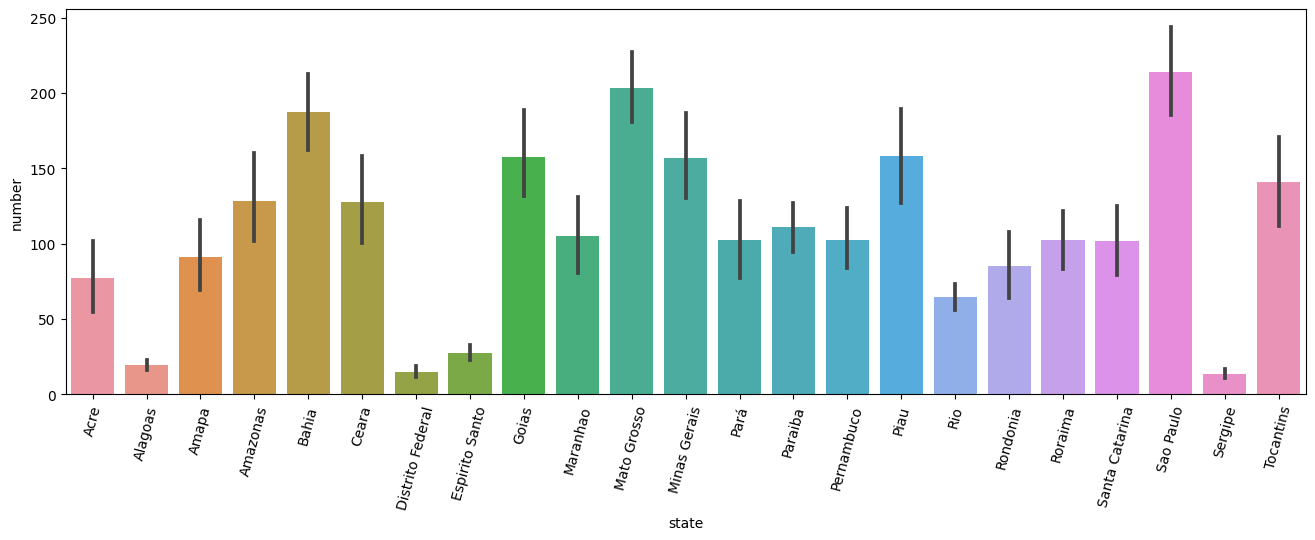

In [70]:
# Lets visualize it
plt.figure(figsize=(16,5))
sns.barplot(data =data,x = 'state',y='number')
plt.xticks(rotation=75)
plt.show()

**Maximum Fires was in the "Matto Grasso" follwed by "Sao Paulo"**

**Find the Total number of fires reported in Amazonas?**

In [71]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [79]:
data[data['state']=='Amazonas']['number'].sum()

30650.129

**Display Number of Fires were reported in Amazonas (Year-wise)**

In [89]:
data4 = data[data['state']=='Amazonas']

In [95]:
data44= data4.groupby('year')['number'].sum().reset_index()

In [96]:
data44

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


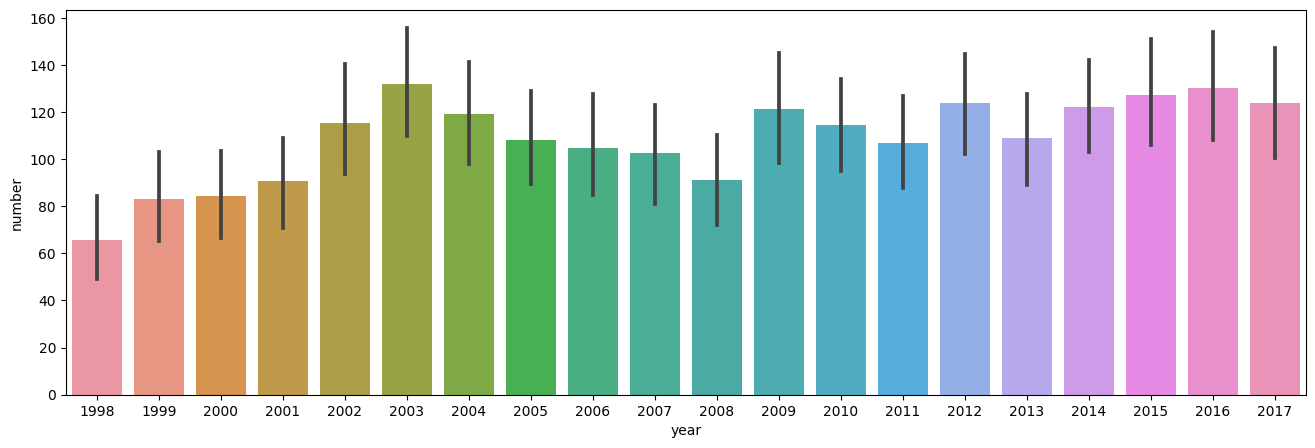

In [100]:
plt.figure(figsize=(16,5))
sns.barplot(data =data , x='year',y='number')
plt.show()

**Display Number of Forest Fires reported in the Amazonas day wise?**

In [101]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [105]:
data11 = data[data['state']=='Amazonas']

In [122]:
day = data11.groupby(data11['date'].dt.dayofweek).sum().number

import calendar
day.index = [calendar.day_name[x]for x in range(0,7)]
day = day.reset_index()

<ipython-input-122-426cdb304a20>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day = data11.groupby(data11['date'].dt.dayofweek).sum().number


In [123]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<Axes: xlabel='index', ylabel='number'>

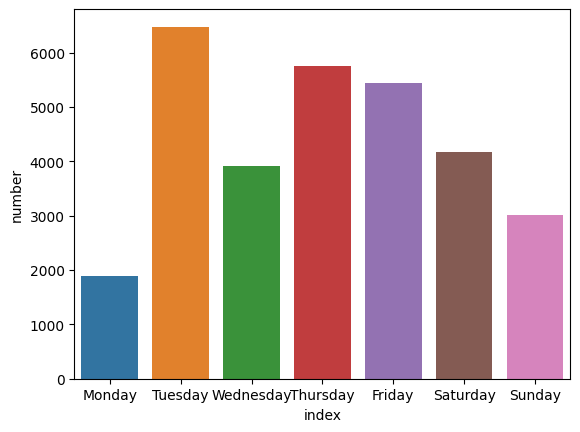

In [124]:
sns.barplot(data = day , x ='index',y='number')

**Find Total Number of Fires were reported in 2015 and Visualize data based on Each Month**

In [125]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [145]:
data_2015 = data[data['year']==2015].groupby('month_new')['number'].sum().reset_index()

In [146]:
data_2015

,month_new,number
0,April,2573.000
1,Aug,4363.125
2,Dec,4088.522
3,Feb,2309.000
4,Jan,4635.000
5,July,4364.392
6,June,3260.552
7,May,2384.000
8,Nov,4034.518
9,Oct,4499.525


<Axes: xlabel='month_new', ylabel='number'>

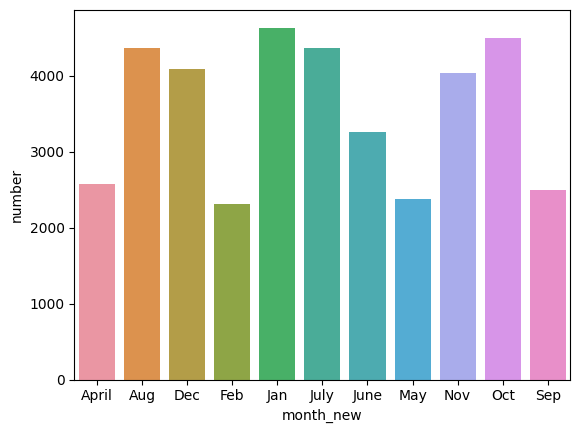

In [147]:
sns.barplot(data = data_2015 ,x ='month_new',y ='number')

**Find the average number of Fires were reported from Highest to lowest (State-Wise)**

In [148]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [160]:
avg_data = data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

In [161]:
avg_data

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


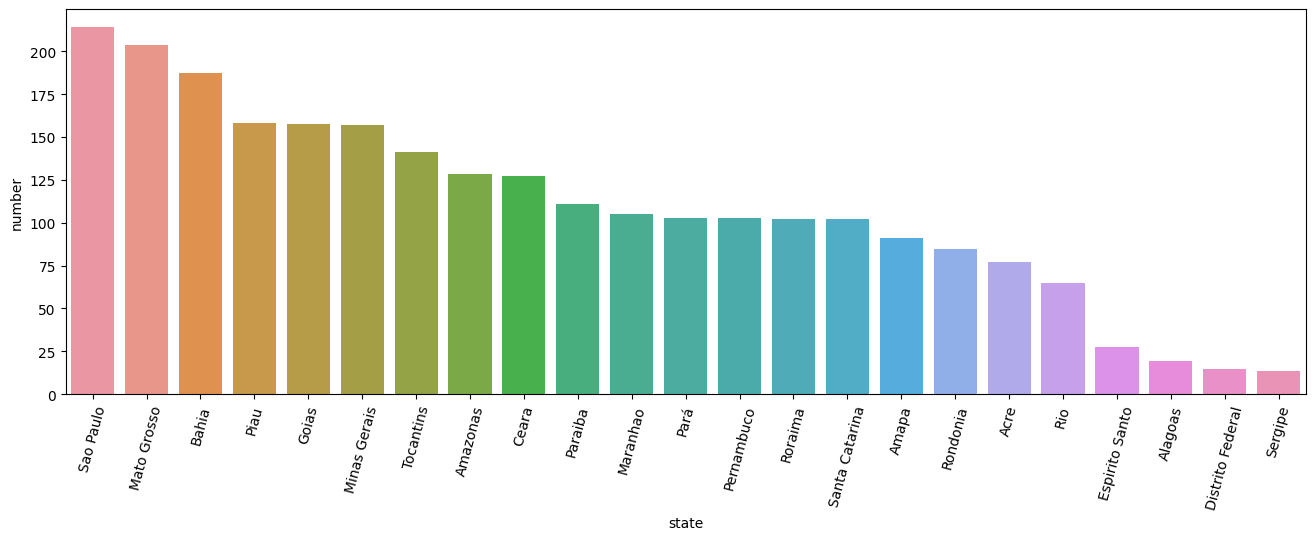

In [164]:
plt.figure(figsize=(16,5))
sns.barplot(data = avg_data ,x ='state',y ='number')
plt.xticks(rotation =75)
plt.show()

**Find the State names where fires were reported in Dec month**

In [165]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [177]:
data[data['month_new']=='Dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

# **Thank You**